<a href="https://colab.research.google.com/github/Sandra3657/ml/blob/master/Marketing_campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Importing required libraries** 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve, plot_precision_recall_curve
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')


In [3]:
#Displaying the the top 5 rows
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Displaying the last 5 rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
#Shape of the dataset
df.shape

(5000, 14)

In [6]:
# Removing the 'ID' column as it does not have any contribution. 
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
 #Datatypes of the columns
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
#Information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [9]:
#Basic statistcal summary
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The 'Experience' column contains negative values which is not possible.

In [10]:
#Checking the null values
df.isnull().any().sum()     #No null values

0

#**2. Cleaning the data**

In [11]:
#Checking the correlation between 'Experience' and 'Age' columns
correlation = df['Experience'].corr(df['Age'])
print(correlation)

0.9942148569683321


There is high correlation between 'Age' and 'Experience' columns. So, it is possible to drop the 'Experience' column.

In [12]:
#Dropping the 'Experience' column
df.drop(['Experience'], axis=1, inplace=True)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1



#**3.EDA**

In [13]:
#The number of unique values in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [14]:
#Zero mortgage count
zero_mortgage_count=len(df[df.Mortgage==0])
print('Number of people with zero mortgage:',zero_mortgage_count)
print('Percentage: ',zero_mortgage_count/len(df))

Number of people with zero mortgage: 3462
Percentage:  0.6924


69.2% of the the people in the given dataset has zero mortgage.

In [15]:
#Zero Credit Card spending
zero_credit_count=len(df[df.CreditCard==0])
print('Number of people with zero credit card spending:',zero_credit_count)
print('Percentage: ',zero_credit_count/len(df))

Number of people with zero credit card spending: 3530
Percentage:  0.706


70.6% of the the people in the given dataset has zero Credit Card Spending.

In [16]:
#Value Count for categrical values
categorical= df[['Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']]
numerical = df[['Age','Income','CCAvg','Mortgage']]
for col in categorical:
  print(col)
  print(df[col].value_counts())
  print('\n')


Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64


Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64


CD Account
0    4698
1     302
Name: CD Account, dtype: int64


Online
1    2984
0    2016
Name: Online, dtype: int64


CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64




***Univariate Analysis***

In [17]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

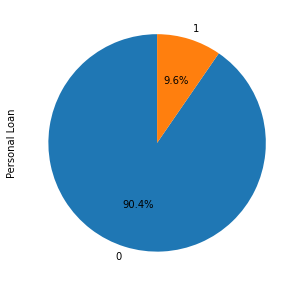

In [18]:
plt.figure(figsize=(5,5))
df["Personal Loan"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

The percentage of people who had taken a 'Personal Loan' is very less in the given data set. So, stratification must be done when splitting the dataset into training and test set.


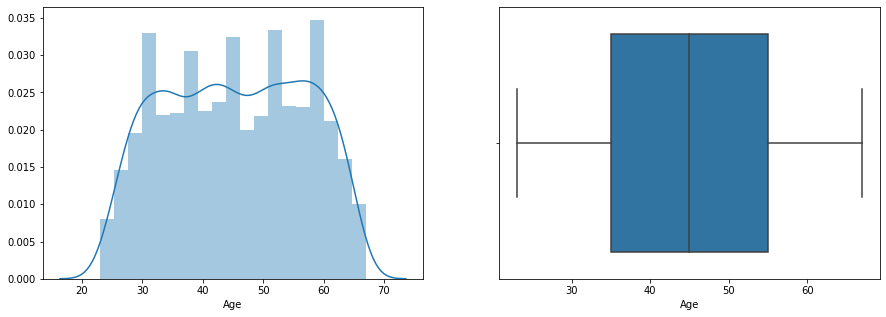

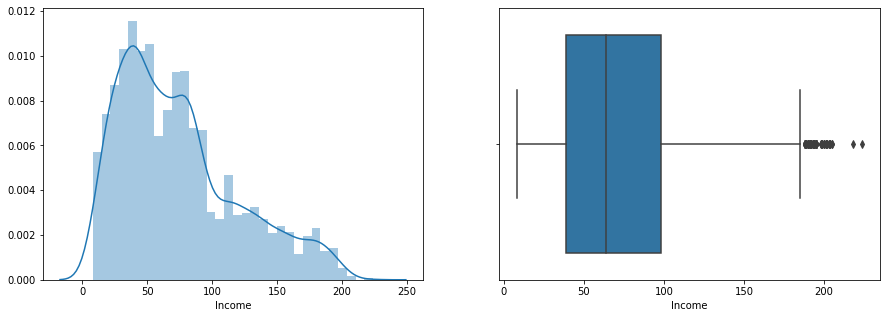

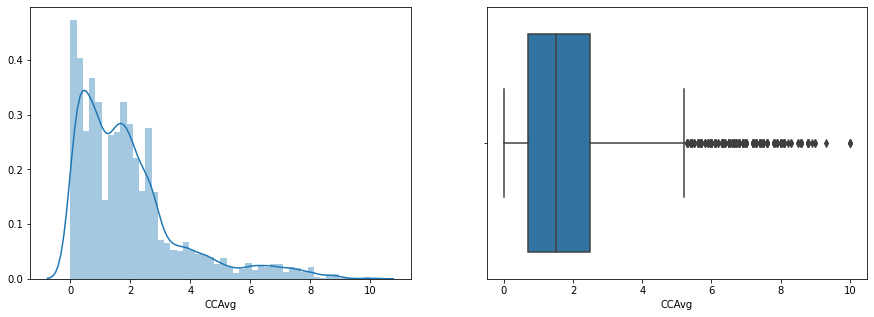

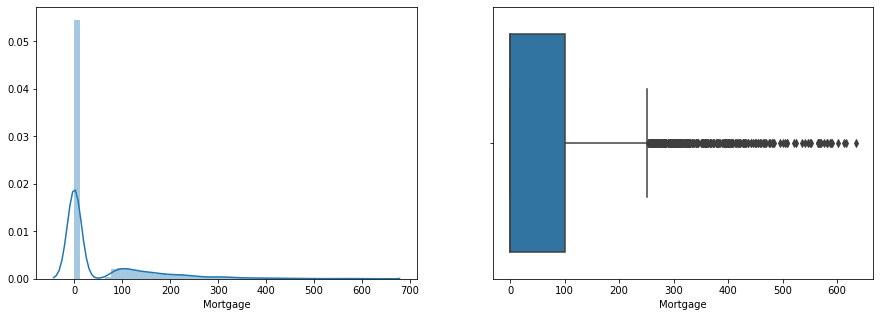

In [19]:
# numerical = df[['Age','Income','CCAvg','Mortgage']]
for col in numerical:
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col], ax=ax2)
  plt.show()

From the distplot of the 'Age' column, it is seen that most of the datset information have been collected from people of 30-60 age.

The annual Income of most of  the people in the given dataset centers around \$50000 dollars with some earning upto \$250000.

The average credit card spending is around 0-2000 dollars. The average credit card spending is upto $10000

Most have an house mortgage of $0. Some, have an house mortgage value around 100000-300000 dollars
 

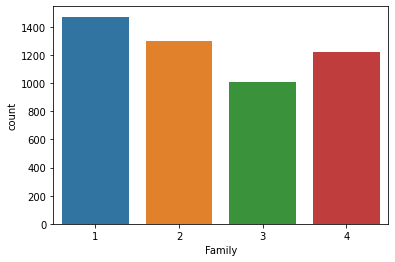

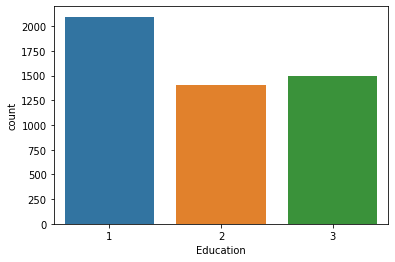

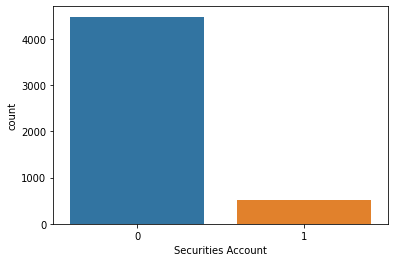

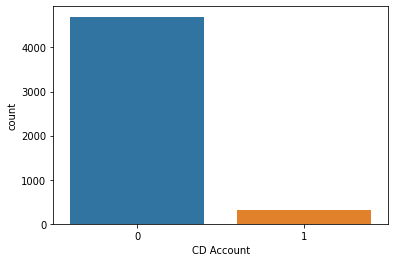

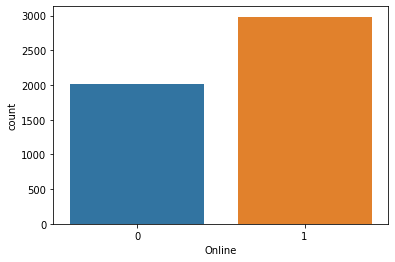

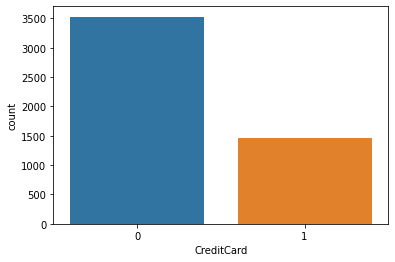

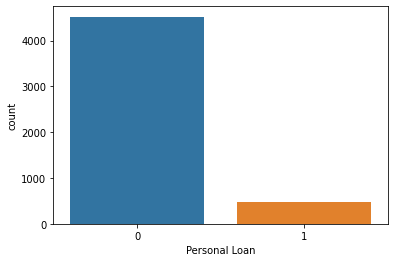

In [20]:
#categorical= df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
for col in categorical:
  sns.countplot(df[col])
  plt.show()

***Bivariate Analysis***

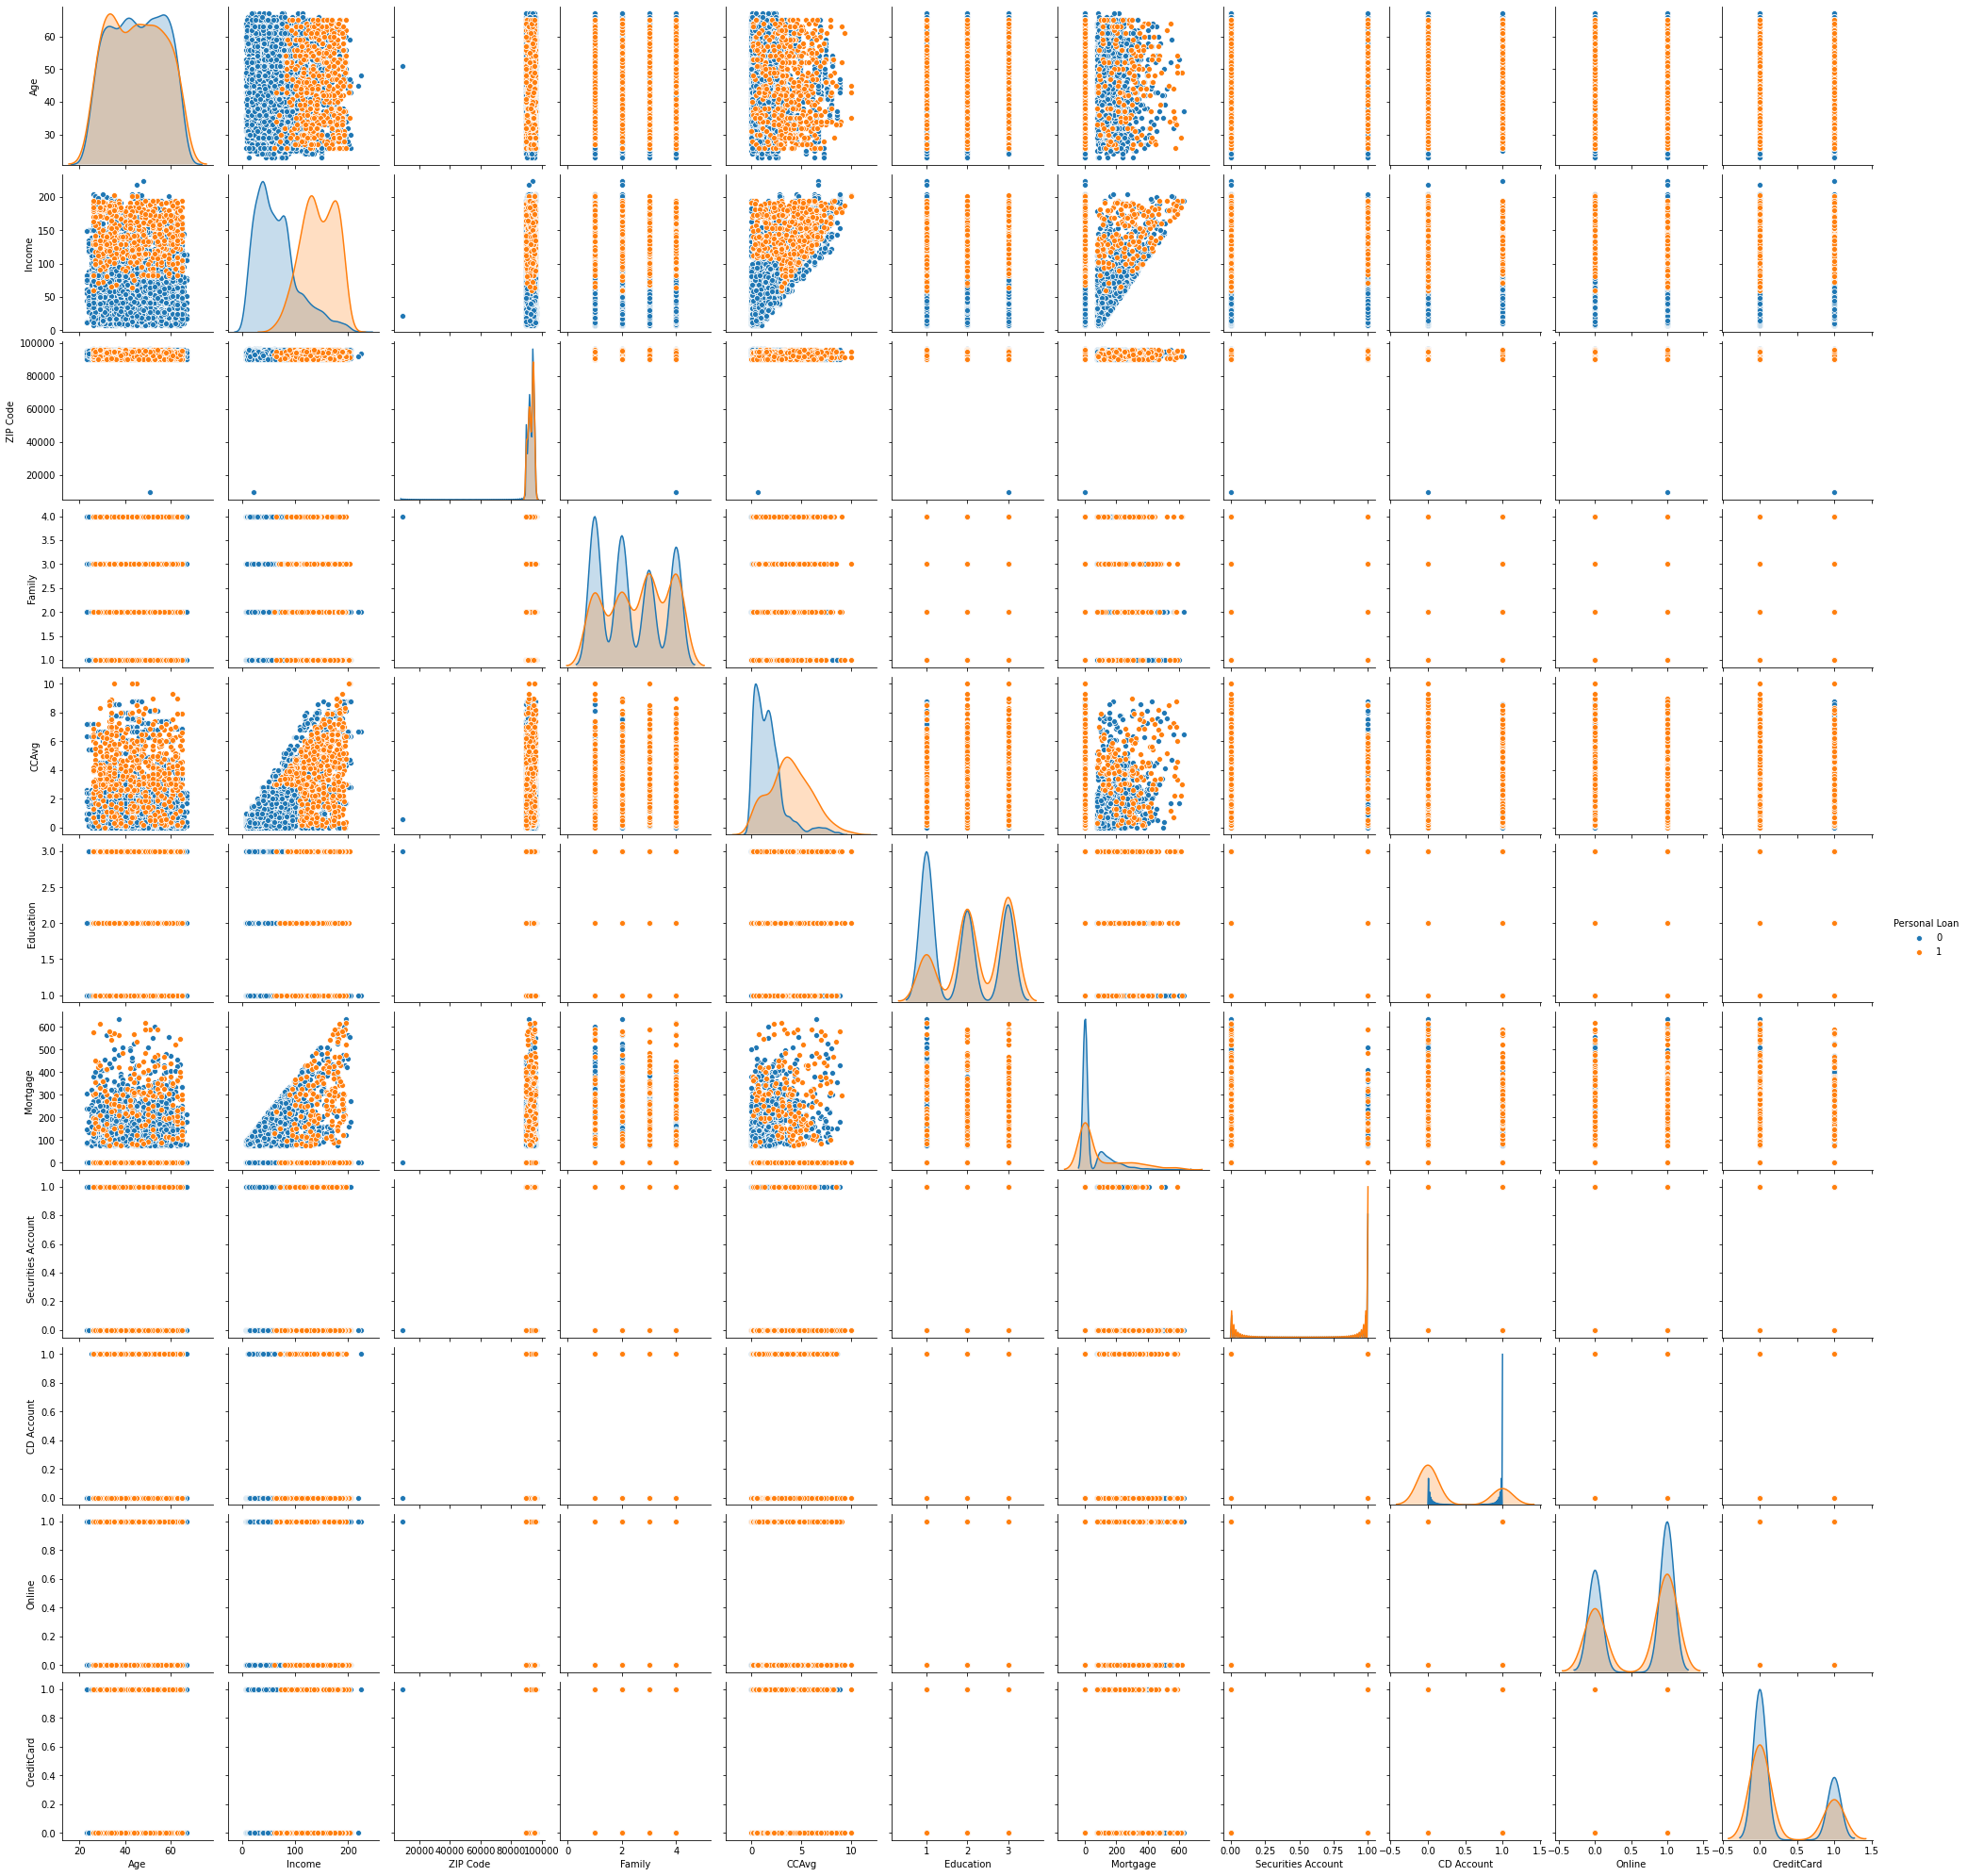

In [21]:
#Pair-wise Analysis
sns.pairplot(df,hue="Personal Loan")

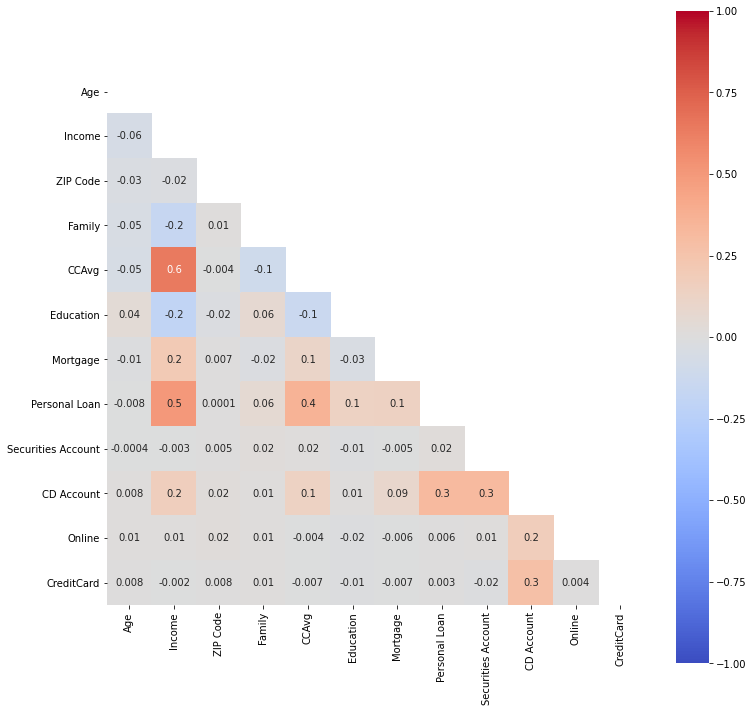

In [22]:
#Heat Map for finding the corelation between the attributes
fig, ax = plt.subplots(figsize=(12,12))        
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,square=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='0.1g')

From the heatmap, it is found that 'ZIP Code' has very less correlation with the target value 'Personal Income'. So, only this column can be removed from  the dataframe.


In [23]:
df.drop(['ZIP Code'], axis=1, inplace=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


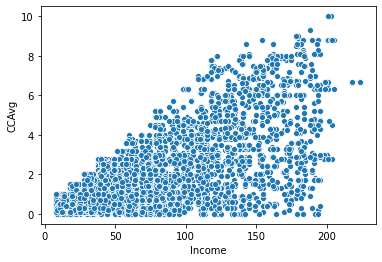

In [24]:
sns.scatterplot(df.Income, df.CCAvg)

From the above scatterplot, it can be seen that as income increase, the avg. credit card  spending per month also increases

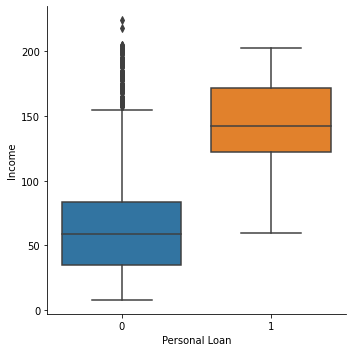

In [25]:
sns.catplot(x="Personal Loan", y="Income", kind="box", data=df)

From the above plot, it can be seen that most of those who take personal loans have higher income.

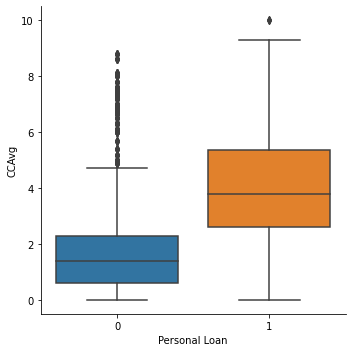

In [26]:
sns.catplot(x="Personal Loan", y="CCAvg", kind="box", data=df)

From the above plot, it can be seen that most of those who take personal loans have higher credit card spending.

# **4.Tranforming feature variables**

The 'Income' and 'CCAvg' values have a skewed distribution. So the 'yeo-johnmson' power-transformer is applied to these values so as to reduce the skewness.

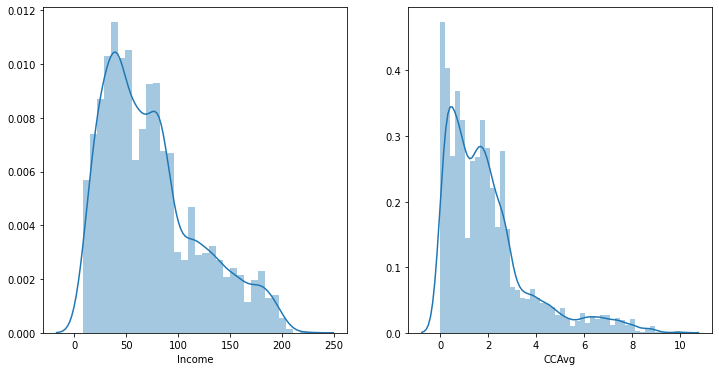

In [27]:
#Before Transformation
fig = plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.Income)
plt.subplot(1,2,2)
ax2 = sns.distplot(df.CCAvg)


In [28]:
#Applying 'yeo-johnson' power transformer to 'Income' aqnd 'CCAvg' columns.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False) 
pt.fit(df["Income"].values.reshape(-1,1))
df["Income"] = pt.transform(df["Income"].values.reshape(-1,1))

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False) #Applying 'yeo-johnson' power transformer to all numerical categories.
pt.fit(df["CCAvg"].values.reshape(-1,1))
df["CCAvg"] = pt.transform(df["CCAvg"].values.reshape(-1,1))


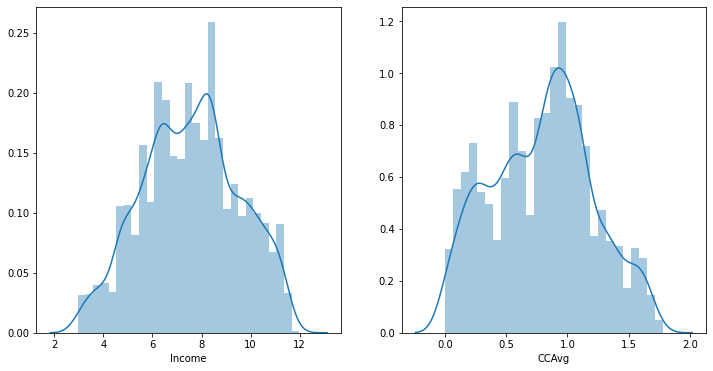

In [29]:
#After Transformation
fig = plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.Income)
plt.subplot(1,2,2)
ax2 = sns.distplot(df.CCAvg)


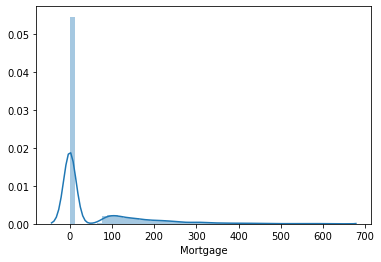

In [30]:
sns.distplot(df.Mortgage)

In [31]:
#Applying binning
df["Mortgage Int"] = pd.cut(df["Mortgage"], bins=[0,100,200,300,400,500,600,700], labels=[0,1,2,3,4,5,6], include_lowest=True)
df.drop("Mortgage", axis=1, inplace=True)

'Binning' is applied to the 'Mortgage' column and added to the dataframe as 'Mortgage Int'. The 'Mortgage' column is then removed as it is no longer required.

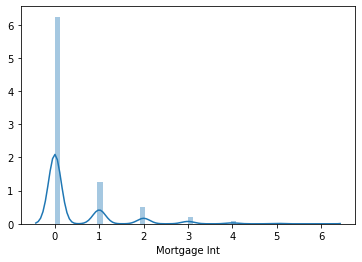

In [32]:
sns.distplot(df["Mortgage Int"])

In [33]:
df.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage Int
0,25,6.827583,4,0.845150,1,0,1,0,0,0,0
1,45,5.876952,3,0.814468,1,0,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,0,1,0


# **5. Splitting the data set and Standardizing the training and test dataset**

In [34]:
#Splitting the dataframe into feature and target variables.
X = df.loc[:,df.columns != 'Personal Loan'] 
y= df['Personal Loan']
X,y

(      Age    Income  Family  ...  Online  CreditCard  Mortgage Int
 0      25  6.827583       4  ...       0           0             0
 1      45  5.876952       3  ...       0           0             0
 2      39  3.504287       1  ...       0           0             0
 3      35  8.983393       1  ...       0           0             0
 4      35  6.597314       4  ...       0           1             0
 ...   ...       ...     ...  ...     ...         ...           ...
 4995   29  6.287699       1  ...       1           0             0
 4996   30  4.077942       4  ...       1           0             0
 4997   63  5.058173       2  ...       0           0             0
 4998   65  6.827583       3  ...       1           0             0
 4999   28  8.379274       3  ...       1           1             0
 
 [5000 rows x 10 columns], 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4995    0
 4996    0
 4997    0
 4998    0
 4999    0
 Name: Personal Loan, Length: 5000,

In [35]:
#The feature and target variables are split into training and test set of ratio 70:30, while also applying stratification 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [36]:
#Applying StandardScaler to X_train and X_test.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
    
X_train_np = ss.fit_transform(X_train.values)
X_test_np = ss.transform(X_test.values)

X_train = pd.DataFrame(X_train_np, columns=X_train.columns)
X_test = pd.DataFrame(X_test_np, columns=X_test.columns)

In [37]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage Int
0,0.509897,-1.264019,0.529572,-1.149017,-1.033620,-0.336499,-0.248783,0.838548,1.529606,-0.474909
1,1.643610,-0.811695,-1.217367,0.042330,0.152113,2.971777,-0.248783,-1.192537,-0.653763,-0.474909
2,0.597106,-0.962558,1.403042,0.254748,-1.033620,-0.336499,-0.248783,0.838548,1.529606,-0.474909
3,-1.147068,-1.465468,-1.217367,-0.997577,1.337845,-0.336499,-0.248783,0.838548,-0.653763,0.683405
4,1.469193,-0.228584,-1.217367,-0.610326,-1.033620,2.971777,-0.248783,-1.192537,1.529606,-0.474909


In [38]:
X_test.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage Int
0,-0.972651,1.804387,-1.217367,2.239865,1.337845,-0.336499,-0.248783,-1.192537,-0.653763,-0.474909
1,0.858732,0.383568,-0.343897,1.149055,-1.033620,2.971777,-0.248783,-1.192537,-0.653763,-0.474909
2,0.248271,1.160343,-1.217367,1.694800,-1.033620,2.971777,-0.248783,-1.192537,-0.653763,-0.474909
3,1.207566,0.762920,1.403042,0.883515,0.152113,-0.336499,-0.248783,0.838548,-0.653763,0.683405
4,-0.100564,0.403169,-0.343897,-1.149017,-1.033620,-0.336499,-0.248783,0.838548,1.529606,-0.474909


#**6.Fitting the data to Logistic Regression Model**

In [39]:
log_clf = LogisticRegression(random_state=0, C=1)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)


#**7. Metrics for the Logistic Regression Model**

********** Logistic Regression **********


Score for Train data: 0.9568571428571429
Score for Test data: 0.9546666666666667


*****************************************




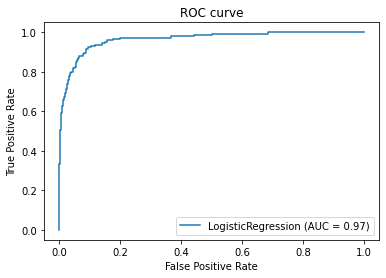

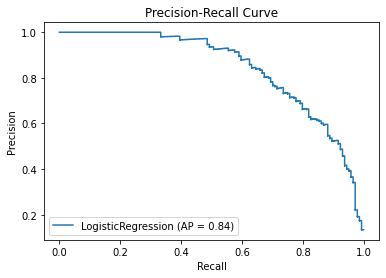

In [40]:
# Scores for the training and test data
print("********** Logistic Regression **********")
print("\n")
print("Score for Train data:",log_clf.score(X_train, y_train)) #94.244. 94.74, 94.74
print("Score for Test data:",log_clf.score(X_test, y_test)) #94.6666, 95.2, 95.4
print("\n")
print("*****************************************")

print("\n")
plot_roc_curve(log_clf,X_test,y_test)
plt.title("ROC curve")

plot_precision_recall_curve(log_clf,X_test,y_test)
plt.title("Precision-Recall Curve")
plt.show()

The accuracy for training set is around 95.69%, whereas for the training set the accuracy is around 95.47%.

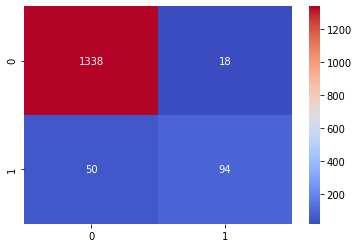

In [41]:
#Plotting the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap= 'coolwarm', fmt='g')


In [42]:
print("***************************************")
print("\n")
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print('ROC-AUC Score:',roc_auc_score(y_test, y_pred))
print("\n")
print("***************************************")


***************************************


Recall: 0.6527777777777778
Precision: 0.8392857142857143
F1: 0.734375
ROC-AUC Score: 0.819751720747296


***************************************


#**8.Comparing with other Classification Algorithms**

In [43]:
models={
    'Logistic Regression': LogisticRegression(random_state=0, C=1),
    'Naive Bayes': GaussianNB(),
    'KNN Classifier': KNeighborsClassifier(n_neighbors = 5),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=0, max_depth=8), 
    'Random Forest Classifier': RandomForestClassifier(random_state=0, max_leaf_nodes=5),
    'Support Vector Machine': SVC(kernel='linear'),
    'XG Boost': XGBClassifier(),
    'Ada Boost': AdaBoostClassifier()
}

In [44]:
names=[]
train_scores=[]
test_scores=[]
recalls=[]
precisions=[]
f1_scores=[]
roc_scores=[]


********** Logistic Regression **********
Score for Train data: 0.9568571428571429
Score for Test data: 0.9546666666666667




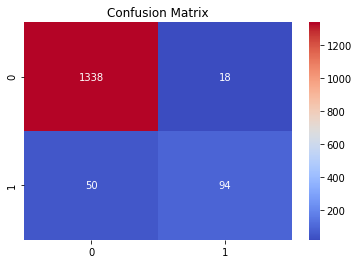



Recall: 0.6527777777777778
Precision: 0.8392857142857143
F1: 0.734375
ROC-AUC Score: 0.819751720747296
*********************************


********** Naive Bayes **********
Score for Train data: 0.9085714285714286
Score for Test data: 0.9133333333333333




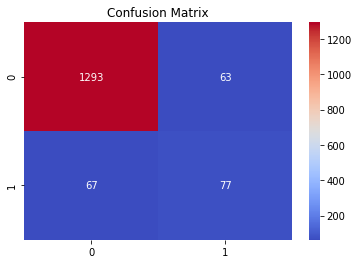



Recall: 0.5347222222222222
Precision: 0.55
F1: 0.5422535211267606
ROC-AUC Score: 0.7441310226155359
*********************************


********** KNN Classifier **********
Score for Train data: 0.9685714285714285
Score for Test data: 0.9626666666666667




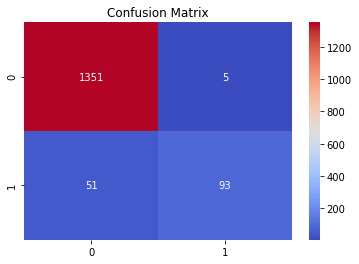



Recall: 0.6458333333333334
Precision: 0.9489795918367347
F1: 0.768595041322314
ROC-AUC Score: 0.8210730088495576
*********************************


********** Decision Tree Classifier **********
Score for Train data: 0.9957142857142857
Score for Test data: 0.9813333333333333




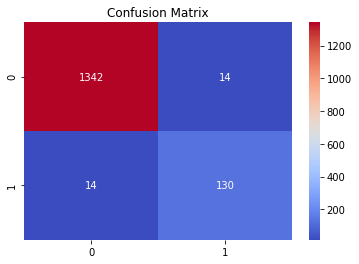



Recall: 0.9027777777777778
Precision: 0.9027777777777778
F1: 0.9027777777777778
ROC-AUC Score: 0.9462266470009832
*********************************


********** Random Forest Classifier **********
Score for Train data: 0.9591428571428572
Score for Test data: 0.9613333333333334




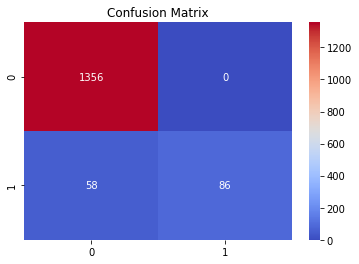



Recall: 0.5972222222222222
Precision: 1.0
F1: 0.7478260869565216
ROC-AUC Score: 0.7986111111111112
*********************************


********** Support Vector Machine **********
Score for Train data: 0.9565714285714285
Score for Test data: 0.958




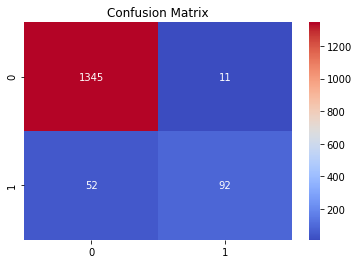



Recall: 0.6388888888888888
Precision: 0.8932038834951457
F1: 0.7449392712550608
ROC-AUC Score: 0.8153883972468043
*********************************


********** XG Boost **********
Score for Train data: 0.9937142857142857
Score for Test data: 0.984




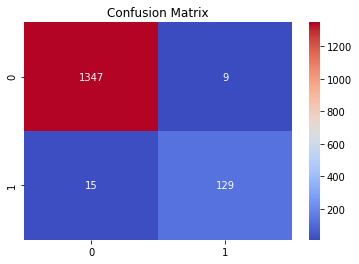



Recall: 0.8958333333333334
Precision: 0.9347826086956522
F1: 0.9148936170212766
ROC-AUC Score: 0.9445980825958703
*********************************


********** Ada Boost **********
Score for Train data: 0.9731428571428572
Score for Test data: 0.9726666666666667




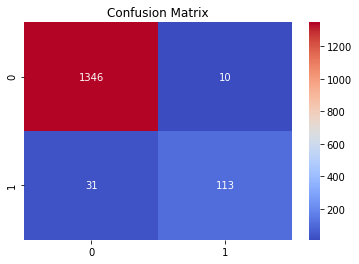



Recall: 0.7847222222222222
Precision: 0.9186991869918699
F1: 0.8464419475655431
ROC-AUC Score: 0.8886737954768928
*********************************




In [52]:
#Applying various classification algorithms
row_index=0
for name, model in models.items():
  print(f"********** {name} **********")

  clf = model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  print("Score for Train data:",train_score)
  print("Score for Test data:",test_score) 
  print("\n")

  train_scores.append(round(train_score, 3))
  test_scores.append(round(test_score, 3))
  names.append(name)

  cm2 = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm2, annot=True, cmap= 'coolwarm', fmt='g') 
  plt.title('Confusion Matrix')
  plt.show()
  print("\n")

  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc = roc_auc_score(y_test, y_pred)

  recalls.append(round(recall,3))
  precisions.append(round(precision, 3))
  f1_scores.append(round(f1, 3))
  roc_scores.append(round(roc, 3))

  print("Recall:", recall)
  print("Precision:", precision)
  print("F1:", f1) 
  print('ROC-AUC Score:',roc)
  print("*********************************")
  print("\n")

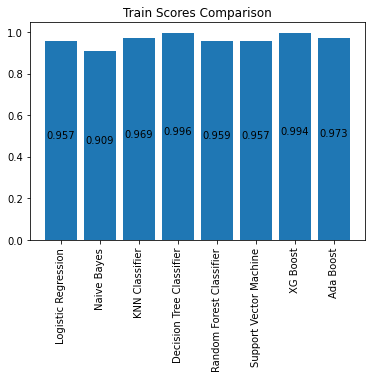

In [46]:
#Comparing train scores
name_pos = np.arange(len(names))
bar = plt.bar(name_pos, train_scores)
plt.xticks(name_pos, names, rotation=90)
plt.title('Train Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                train_scores[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

The 'Decision Tree Classifier' and'XG Boost' has the best train scores, while 'Naive Bayes' has the least score.

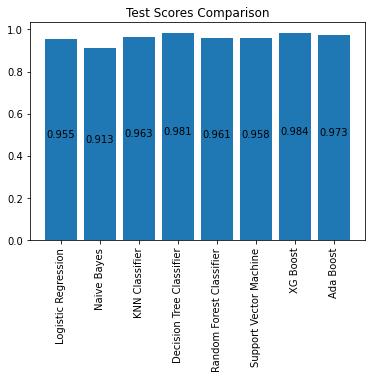

In [47]:
#Comparing test scores
bar = plt.bar(name_pos, test_scores)
plt.xticks(name_pos, names, rotation=90)
plt.title('Test Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                test_scores[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

'XG Boost' and 'Decision Tree Classifier' has the best test scores, while 'Naive Bayes' has the least.

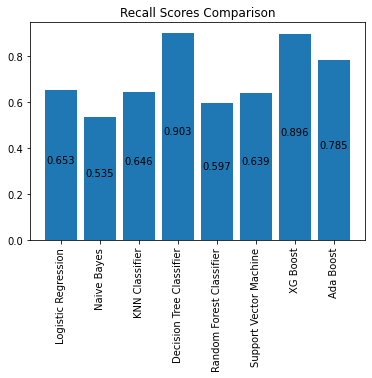

In [48]:
#Comparing recall scores
bar = plt.bar(name_pos, recalls)
plt.xticks(name_pos, names, rotation=90)
plt.title('Recall Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                recalls[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

The 'Decision Tree Classifier' and 'XG Boost' has the best recall scores, while 'Naive Bayes' has the least.

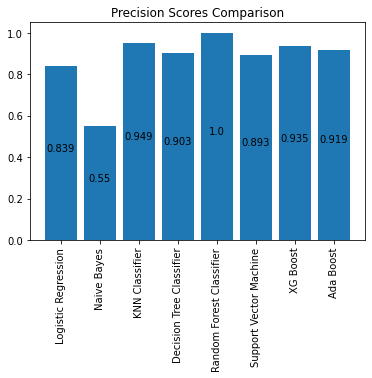

In [49]:
#Comparing precision scores
bar = plt.bar(name_pos, precisions)
plt.xticks(name_pos, names, rotation=90)
plt.title('Precision Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                precisions[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

'Random Forest Classifier' has a precision of 1, whereas 'Naive Bayes' has the least with precision 0.55

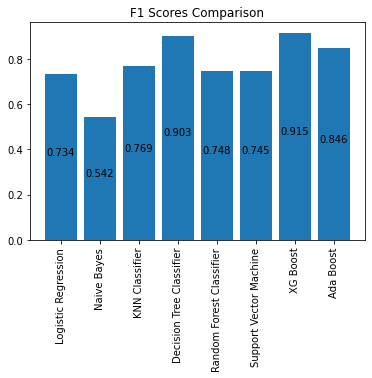

In [50]:
#Comparing f1 scores
bar = plt.bar(name_pos, f1_scores)
plt.xticks(name_pos, names, rotation=90)
plt.title('F1 Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                f1_scores[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

'XG Boost' and 'Decision Tree Classifier' has the highest F1 scores. 'Naive Bayes' has the least.

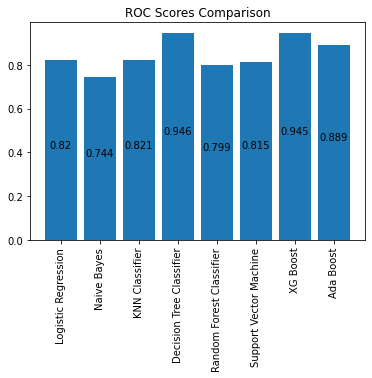

In [51]:
#Comparing roc scores
bar = plt.bar(name_pos, roc_scores)
plt.xticks(name_pos, names, rotation=90)
plt.title('ROC Scores Comparison')

id=0
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                roc_scores[id],
                ha='center', va='bottom')
  id=id+1
plt.show()

'Decision Tree Clasifier' and 'XG Boost' has the highest ROC scores.

#**9. Conclusion**

The goal of this Machine Learning Model is to identify the potential customers of a particular bank, who have higher probability of purchasing a loan.

From the given data, only required information has been chosen for building the model. 'ID', 'ZIP Code' does not contribute to the fact wheather a person will take a personal loan or not. So these columns have been dropped.

Next, the 'Experience' column is highly correlated with age, so this column has also been dropped from the dataset.

On conducting, Exploratory Data Analysis(EDA) on the given data, it has been found that 'Inome' and 'CCAvg' data have a skewed distribution. So, the method of'yeo-johnson' Power-Transformer has been applied to reduce the skewness. Scaling of the feature variables is also done so as to bring all the features on the same range.


---


*The Logistic Regression model has been applied to the given dataset.* 

  *Accuracy: 95.47%*

  *Recall: 0.65*

  *Precision: 0.84*
 
  *F1: 0.73*
 
  *ROC: 0.82* 
  

---

The given datset has then been analysed using various other Classification Algorithms and the performance has been compared. The performance of 'Logistic Regression' is good, when comparing with other algorithms.